In [1]:
import numpy as np
data =np.loadtxt('ex1data1.txt', delimiter=',')
X = data[:,0]
y = data[:,1]
m = len(y)

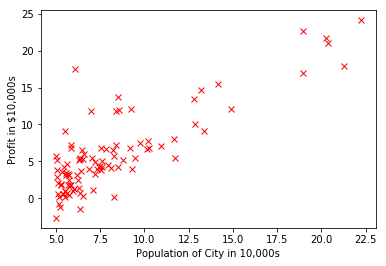

In [2]:
import matplotlib.pyplot as plt
plt.plot(X, y, 'rx')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.show()

In [3]:
X = np.column_stack((np.ones((m, 1), dtype=float), data[:, 0]))
theta = np.zeros((2,1))

iterations = 1500
alpha = 0.01

In [4]:
delta = np.dot(X, theta).reshape(1, m) - y
J_theta=np.sum(delta*delta)/(2*m)


In [5]:
print(J_theta)

32.0727338775


In [6]:
theta_prev = theta
delta_theta_0 = np.sum(delta)/m
theta = np.zeros((2,1))
for i in range(iterations):
    delta = np.dot(X, theta).reshape(1, m) - y
    delta_theta = alpha * np.array([np.sum(delta)/m, np.sum(delta*X[:,1])/m])
    theta -= delta_theta.reshape(2,1)
    J_theta = np.sum(delta*delta)/(2*m)

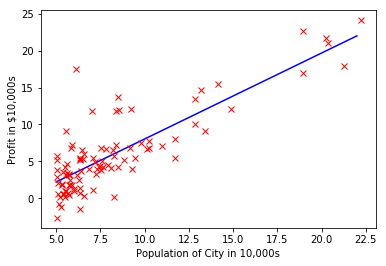

In [7]:
X1_slick =  np.linspace(5, 22, 5)
n_X1_slick = len(X1_slick)
X1 = np.column_stack((np.ones((n_X1_slick, 1), dtype=float),X1_slick))
y1 = np.dot(X1, theta).reshape(1,n_X1_slick)
plt.plot(X1[:,1], y1[0], 'b')
plt.plot(X[:,1], y, 'rx')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.show()

In [8]:
theta0_vals = np.linspace(-10, 10, 50)
theta1_vals = np.linspace(-1, 4, 50)


In [9]:
n_theta0_vals = len(theta0_vals)
n_theta1_vals = len(theta1_vals)
J_vals = np.zeros(n_theta0_vals*n_theta1_vals).reshape(n_theta0_vals, n_theta1_vals)
for i in range(n_theta0_vals):
    for j in range(n_theta1_vals):
        t = [theta0_vals[i], theta1_vals[j]]
        delta = np.dot(X, t).reshape(1, m) - y
        J_vals[i,j]=np.sum(delta*delta)/(2*m)

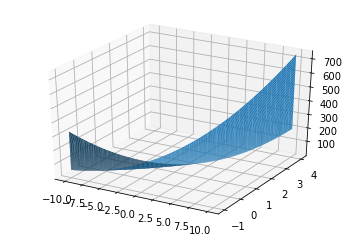

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals)
plt.show()